# Frequency Dependence

In [1]:
import sys
sys.path.append(r"C:\Users\user\Desktop\PhD\Bruno Paper\Code\Approach A")
import numpy as np
import random as rand
from Trajectory import Trajectory
from System import System
from traj2vec import traj2vec, vec2traj
import trajectory_functions as traj_funcs
import residual_functions as res_funcs
from my_fft import my_fft, my_ifft
import matplotlib.pyplot as plt
from min_wrapper import my_min
from test_cases import lorenz
from test_cases import unit_circle_3d as uc3
import h5py

# %matplotlib qt

In [2]:
sys = System(lorenz)

mean = np.zeros(3)
mean[2] = 23.042103969255397
# mean[2] = 23

## Define new residual function

In [3]:
def gr_wrapper(traj, sys, mean):
    # precompute everything that doesn't require frequency
    grad = traj_funcs.traj_grad(traj)

    traj[:, 0] = mean
    response = traj_funcs.traj_response(traj, sys.response)
    traj[:, 0] = 0

    def gr_freq(freqs):
        grs = np.zeros_like(freqs)
        for i in range(np.shape(freqs)[0]):
            local_res = (freqs[i]*grad) - response
            local_res_norm_sq = traj_funcs.traj_inner_prod(local_res, local_res)
            grs[i] = 0.5*np.real(local_res_norm_sq[0, 0])
        return grs

    return gr_freq

## T = 1.5

### i = 0

In [4]:
stdev = 1
mu = 0
T1 = 1.5
op_traj_T1 = Trajectory(np.zeros([3, int(T1*12)], dtype = complex))
for i in range(1, op_traj_T1.shape[1]):
    for j in range(3):
        op_traj_T1[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_T1 = (2*np.pi)/T1
traces_T1 = None

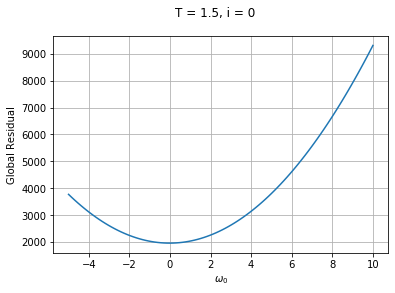

In [5]:
gr_T1_i0 = gr_wrapper(op_traj_T1, sys, mean)
freqs_T1 = np.linspace(-5, 10, 100)
grs_T1 = gr_T1_i0(freqs_T1)

plt.figure(1)
plt.plot(freqs_T1, grs_T1)
plt.xlabel("$\omega_0$")
plt.ylabel("Global Residual")
plt.suptitle("T = 1.5, i = 0")
plt.grid()
plt.show()

In [776]:
# op_traj_T1 = 1e-1*op_traj_T1


b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
Period of orbit: 1.5
Global Residual: 5.2698496630118745


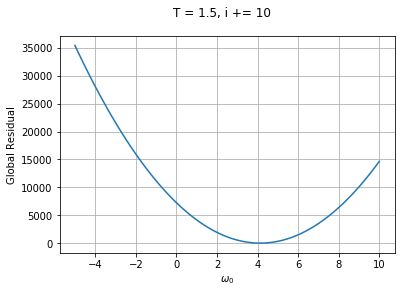

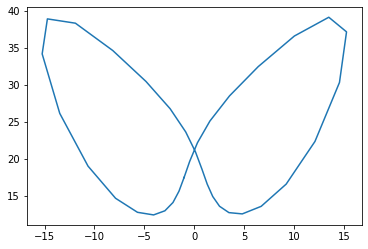

In [14]:
maxiter_T1 = 10

op_traj_T1, op_freq_T1, traces_T1, sol_T1 = my_min(op_traj_T1, sys, op_freq_T1, mean, iter = maxiter_T1, traces = traces_T1)

print()
print(sol_T1.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_T1))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_T1, sys, op_freq_T1, mean)))

gr_T1_i10 = gr_wrapper(op_traj_T1, sys, mean)
grs_T1 = gr_T1_i10(freqs_T1)

plt.figure(1)
plt.plot(freqs_T1, grs_T1)
plt.xlabel("$\omega_0$")
plt.ylabel("Global Residual")
plt.suptitle("T = 1.5, i += 10")
plt.grid()
plt.show()

op_traj_T1.plot(proj = 'xz', mean = mean)

## T = 3

### i = 0

In [809]:
T2 = 3
op_traj_T2 = Trajectory(np.zeros([3, int(T2*12)], dtype = complex))
for i in range(1, op_traj_T2.shape[1]):
    for j in range(3):
        op_traj_T2[j, i] = 0.1*(rand.gauss(0, 1) + 1j*rand.gauss(0, 1))
op_freq_T2 = (2*np.pi)/T2
traces_T2 = None

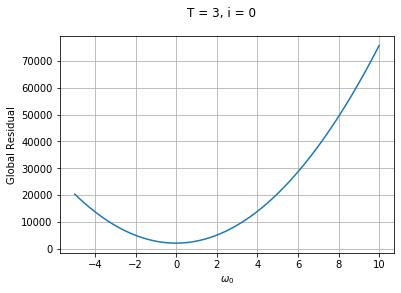

In [810]:
gr_T2_i0 = gr_wrapper(op_traj_T2, sys, mean)
freqs_T2 = np.linspace(-5, 10, 100)
grs_T2 = gr_T2_i0(freqs_T2)

plt.figure(1)
plt.plot(freqs_T2, grs_T2)
plt.xlabel("$\omega_0$")
plt.ylabel("Global Residual")
plt.suptitle("T = 3, i = 0")
plt.grid()
plt.show()

### i += 20


b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
Period of orbit: 3.0
Global Residual: 136.2509754654454


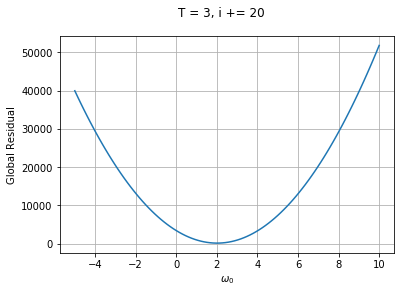

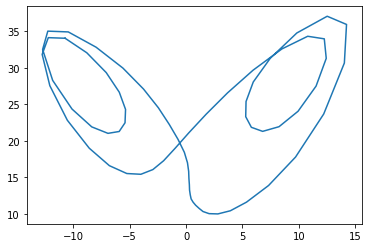

In [814]:
maxiter_T2 = 20

op_traj_T2, op_freq_T2, traces_T2, sol_T2 = my_min(op_traj_T2, sys, op_freq_T2, mean, iter = maxiter_T2, traces = traces_T2)

print()
print(sol_T2.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_T2))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_T2, sys, op_freq_T2, mean)))

gr_T2_i20 = gr_wrapper(op_traj_T2, sys, mean)
grs_T2 = gr_T2_i20(freqs_T2)

plt.figure(1)
plt.plot(freqs_T2, grs_T2)
plt.xlabel("$\omega_0$")
plt.ylabel("Global Residual")
plt.suptitle("T = 3, i += 20")
plt.grid()
plt.show()

op_traj_T2.plot(proj = 'xz', mean = mean)

## T = 10

### i = 0

In [319]:
T3 = 10
op_traj_T3 = Trajectory(np.zeros([3, int(T3*12)], dtype = complex))
for i in range(1, op_traj_T2.shape[1]):
    for j in range(3):
        op_traj_T3[j, i] = 0.1*(rand.gauss(0, 1) + 1j*rand.gauss(0, 1))
op_freq_T3 = (2*np.pi)/T3
traces_T3 = None

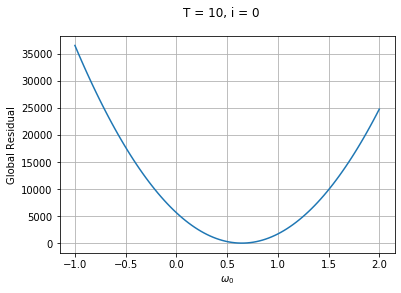

In [333]:
gr_T3_i0 = gr_wrapper(op_traj_T3, sys, mean)
freqs_T3 = np.linspace(-1, 2, 100)
grs_T3 = gr_T3_i0(freqs_T3)

plt.figure(1)
plt.plot(freqs_T3, grs_T3)
plt.xlabel("$\omega_0$")
plt.ylabel("Global Residual")
plt.suptitle("T = 10, i = 0")
plt.grid()
plt.show()

### i += 50


b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
Period of orbit: 10.0
Global Residual: 22.402458751034274


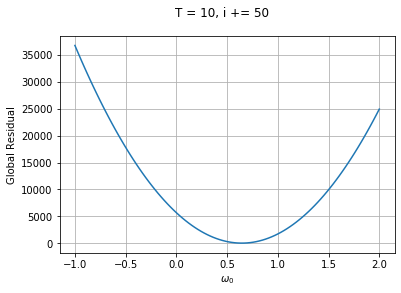

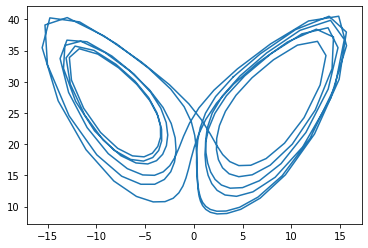

In [334]:
maxiter_T3 = 50

op_traj_T3, op_freq_T3, traces_T3, sol_T3 = my_min(op_traj_T3, sys, op_freq_T3, mean, iter = maxiter_T3, traces = traces_T3)

print()
print(sol_T3.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_T3))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_T3, sys, op_freq_T3, mean)))

gr_T3_i50 = gr_wrapper(op_traj_T3, sys, mean)
grs_T3 = gr_T3_i50(freqs_T3)

plt.figure(1)
plt.plot(freqs_T3, grs_T3)
plt.xlabel("$\omega_0$")
plt.ylabel("Global Residual")
plt.suptitle("T = 10, i += 50")
plt.grid()
plt.show()

op_traj_T3.plot(proj = 'xz', mean = mean)